<a href="https://colab.research.google.com/github/SijiJ/pytorch/blob/main/node-to-edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx


In [ ]:
G = nx.Graph()
G.add_edge(1, 2, weight='6')
G.add_edge(1, 3, weight='7')
G.add_edge(1, 5, weight='8')
G.add_edge(2, 3, weight='9')
G.add_edge(3, 4, weight='10')
G.add_edge(4, 5, weight='11')

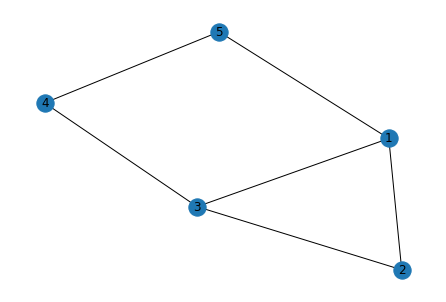

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
count=1
for u,v in G.edges():
  print(u,v)
  #print(type((u,v)))
  G.edges[u, v]["label"]=count
  #G.edges[u, v]["label2"]=count
  count+=1

1 2
1 3
1 5
2 3
3 4
5 4


In [ ]:
for u,v,a in G.edges(data=True):
  print(u,v,a)

1 2 {'weight': '6', 'label': 1}
1 3 {'weight': '7', 'label': 2}
1 5 {'weight': '8', 'label': 3}
2 3 {'weight': '9', 'label': 4}
3 4 {'weight': '10', 'label': 5}
5 4 {'weight': '11', 'label': 6}


In [ ]:
count=1
for n in G.nodes():
  print(n)
  G.nodes[n]['label']=count
  count+=1

1
2
3
5
4


In [ ]:
for n,a in G.nodes(data=True):
  print(n,a)

1 {'label': 1}
2 {'label': 2}
3 {'label': 3}
5 {'label': 4}
4 {'label': 5}


In [ ]:
G.nodes.data()[2]

{'label': 2}

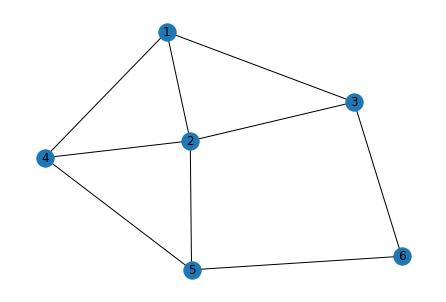

In [ ]:
H = nx.Graph()
na={}
for u,v,a in G.edges(data=True):
  H.add_node(a['label'])
  na[a['label']]=a
nx.set_node_attributes(H, na)
edges=[]
ne={}
for u,v,w in G.edges(data=True):
  edges.append((u,v))
  #print("u,v {},{}".format(u,v))
  for e in u,v:
    for a,b,c in G.edges(data=True):
      if (a,b) in edges:
        continue
      if e in (a,b):
        #print("e {}".format(e))
        #print("a,b {},{}".format(a,b))
        H.add_edge(w['label'], c['label'])
        ne[(w['label'], c['label'])]=G.nodes.data()[e]
        #print(G.nodes.data()[e])
nx.set_edge_attributes(H, ne)
nx.draw(H, with_labels = True)

In [ ]:
for n,a in H.nodes(data=True):
  print(n,a)

1 {'weight': '6', 'label': 1}
2 {'weight': '7', 'label': 2}
3 {'weight': '8', 'label': 3}
4 {'weight': '9', 'label': 4}
5 {'weight': '10', 'label': 5}
6 {'weight': '11', 'label': 6}


In [ ]:
for u,v,a in H.edges(data=True):
  print(u,v,a)

1 2 {'label': 1}
1 3 {'label': 1}
1 4 {'label': 2}
2 3 {'label': 1}
2 4 {'label': 3}
2 5 {'label': 3}
3 6 {'label': 4}
4 5 {'label': 3}
5 6 {'label': 5}
